In [243]:
import cv2
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import numpy as np
from cvzone.HandTrackingModule import HandDetector

In [244]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [245]:
def detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [246]:
def draw_landmarks(image, results):
     #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [247]:
def style_of_landmarks(image, results):
    # draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
    #                         mp_drawing.DrawingSpec(color=(80,50,10), thickness=1,circle_radius=1),
    #                       mp_drawing.DrawingSpec(color=(80,50,10),thickness=1, circle_radius=1))
     # draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw left connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
     # draw right connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1))
    
    

In [248]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [249]:
# define a video capture object
vid = cv2.VideoCapture(0)
detector = HandDetector(maxHands=2)
with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
    while vid.isOpened():
        
        # Capture the video frame
        # by frame
        ret, frame = vid.read()
        hands, frame = detector.findHands(frame)
        # make detection
        image, results = detection(frame, holistic)
        
        # draw landmarks
        style_of_landmarks(image, results)

        # Display the resulting frame
        cv2.imshow('frame', image)
        
        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

In [250]:
results

mediapipe.python.solution_base.SolutionOutputs

In [251]:
draw_landmarks(frame, results)

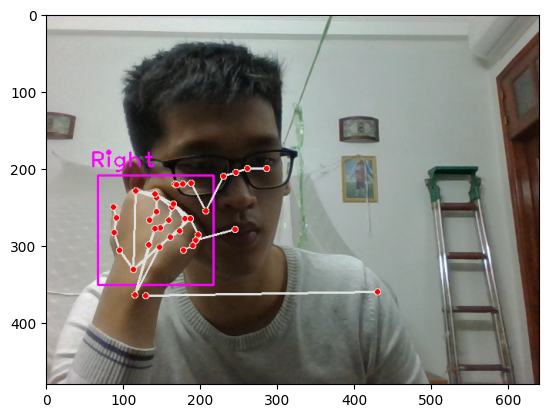

In [252]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [253]:
def extract_key_points(results):
    # take all marks possitions 
    # and put into an list of array
    # these pose will help for the action detection
    poses_list = np.array([[i.x, i.y, i.z, i.visibility] for i in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    left_hand = np.array([[i.x, i.y, i.z] for i in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[i.x, i.y, i.z] for i in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([poses_list, left_hand, right_hand])

In [254]:
result_test = extract_key_points(results)

In [255]:
np.save('0', result_test)

In [256]:
np.load('0.npy')

array([ 3.24442387e-01,  5.32779992e-01, -9.34078813e-01,  9.99758363e-01,
        3.59990507e-01,  4.39189464e-01, -9.18907344e-01,  9.99182165e-01,
        3.85377944e-01,  4.28446263e-01, -9.18786824e-01,  9.99241471e-01,
        4.08353388e-01,  4.17965204e-01, -9.18721378e-01,  9.98995900e-01,
        2.94923544e-01,  4.57380682e-01, -8.83437455e-01,  9.99342680e-01,
        2.77372360e-01,  4.59009081e-01, -8.82686794e-01,  9.99412477e-01,
        2.61530340e-01,  4.59614158e-01, -8.82843614e-01,  9.99450088e-01,
        4.46892172e-01,  4.18414712e-01, -6.32477939e-01,  9.99279499e-01,
        2.64654249e-01,  4.61876720e-01, -4.21510756e-01,  9.99503016e-01,
        3.83462429e-01,  5.82464933e-01, -8.12581658e-01,  9.99625683e-01,
        3.04326683e-01,  6.11793220e-01, -7.53698945e-01,  9.99621630e-01,
        6.72373176e-01,  7.50915349e-01, -3.38607013e-01,  9.97047424e-01,
        2.02778861e-01,  7.61563540e-01, -3.01323503e-01,  9.99297082e-01,
        7.90187478e-01,  

In [257]:
# Setup Folders for Collection
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','iloveyou','ok'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [258]:
# CREATE FOLDER CONTAINS TRAINNING DATA/ SAMPLE ACTION DATA
# IF WANT TO CHANGE ANOTHER DATA BUT THE FOLDER ALREADY FULL
# DELETE THE FOLDER AND RUN THIS PART OF PROGRAM AGAIN

# # for action in actions: 
# #     for sequence in range(no_sequences):
# #         try: 
# #             os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
# #         except:
# #             pass

In [259]:
# # GET TRAINNING DATA
# # UNCOMMENT IF WANT TO USE THIS PART

# # TRAINNING DATA WILL BE GATHERED THROUGHT PICTURES OF ACTIONS THAT RELEVANT 
# # TO THE MESSAGE U WANT TO SHOW
# # HAVING 3 MAIN MESSAGES: HI, THANKS, LOVE 
# # THE COLLECTING PROCESS IS CONTINUOUS SO U 
# # U WILL HAVE 2-3 SECONDS TO CHANGE FORM OF YOUR ACTION BEFORE GO TO THE NEXT RECORD

# # NEED TO COLLECT 30 VID ~ 30 SAMPLE ACTIONS FOR EACH MESSAGE  
# # --> 30 VID FOR 1 MESSAGE * 3 MESSAGE = 90 VIDS :DD

# # ALL WILL BE SAVE INTO FOLDER CREATED BY ABOVE FUNCTION



# # vid = cv2.VideoCapture(0)
# # detector = HandDetector(maxHands=2)
# # with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence=0.5) as holistic:
# #     for action in actions:
# #         # Loop through sequences aka videos
# #         for sequence in range(no_sequences):
# #             # Loop through video length aka sequence length
# #             for frame_num in range(sequence_length):

# #                 # Read feed
# #                 ret, frame = vid.read()

# #                 # Make detections
# #                 image, results = detection(frame, holistic)
# # #                 print(results)

# #                 # Draw landmarks
# #                 style_of_landmarks(image, results)
                
# #                 # NEW Apply wait logic
# #                 if frame_num == 0: 
# #                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
# #                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
# #                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
# #                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
# #                     # Show to screen
# #                     cv2.imshow('OpenCV Feed', image)
# #                     # MODIFY THE RESTING TIME BETWEEN RECODS  
# #                     cv2.waitKey(2000)
# #                 else: 
# #                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
# #                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
# #                     # Show to screen
# #                     cv2.imshow('OpenCV Feed', image)
                
# #                 # NEW Export keypoints
# #                 keypoints = extract_key_points(results)
# #                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
# #                 np.save(npy_path, keypoints)

# #                 if cv2.waitKey(10) & 0xFF == ord('q'):
# #                     break
    
# # # After the loop release the cap object
# # vid.release()
# # # Destroy all the windows
# # cv2.destroyAllWindows()

In [260]:
vid.release()
cv2.destroyAllWindows()

In [261]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [262]:
label_map = {label:num for num,label in enumerate(actions)}

In [263]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)).replace("\\","//")
            res = np.load(path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [264]:
np.array(sequences).shape

(90, 30, 258)

In [265]:
np.array(labels).shape

(90,)

In [266]:
x = np.array(sequences)


In [267]:
x

array([[[ 0.53468579,  0.41987202, -0.54979235, ...,  0.06866481,
          0.45013091, -0.08534293],
        [ 0.51536787,  0.42010254, -0.97756708, ...,  0.04216594,
          0.47270414, -0.09243285],
        [ 0.51297843,  0.42018336, -1.05684876, ...,  0.04514557,
          0.48086902, -0.08488932],
        ...,
        [ 0.51501042,  0.4330138 , -1.04493225, ...,  0.04237682,
          0.46911383, -0.08310838],
        [ 0.51706827,  0.4329769 , -1.05173993, ...,  0.04240416,
          0.4709104 , -0.08350483],
        [ 0.51893502,  0.43270192, -1.05043352, ...,  0.04266365,
          0.47084862, -0.0830429 ]],

       [[ 0.51982462,  0.43252605, -1.01563931, ...,  0.04223333,
          0.47259831, -0.08443052],
        [ 0.51983041,  0.43052208, -0.94278318, ...,  0.0446967 ,
          0.47640422, -0.08199009],
        [ 0.51979333,  0.42948654, -0.91529578, ...,  0.04568208,
          0.47650975, -0.08084452],
        ...,
        [ 0.51434612,  0.43380755, -0.98537397, ...,  

In [268]:
y = to_categorical(labels).astype(int)

In [269]:
y.shape

(90, 3)

In [270]:
x.shape

(90, 30, 258)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05)


In [272]:
y_test.shape

(5, 3)

In [273]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [274]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [275]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [276]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [277]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 5s 120ms/step - loss: 1.0877 - categorical_accuracy: 0.4000
Epoch 2/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.0484 - categorical_accuracy: 0.6000
Epoch 3/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.7970 - categorical_accuracy: 0.6824
Epoch 4/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.7526 - categorical_accuracy: 0.6000
Epoch 5/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.0183 - categorical_accuracy: 0.4471
Epoch 6/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.7303 - categorical_accuracy: 0.6353
Epoch 7/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.7817 - categorical_accuracy: 0.5176
Epoch 8/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.6925 - categorical_accuracy: 0.6235
Epoch 9/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6385 - categorical_accuracy:

In [278]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 237,251
Trainable params: 237,251
Non-tr

In [279]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [280]:
actions[np.argmax(res[4])]

'hello'

In [281]:
actions[np.argmax(y_test[4])]

'hello'

In [282]:
model.save('action.h5')


In [283]:
model.load_weights('action.h5')

In [284]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [285]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 153ms/step


In [286]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [287]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [0, 3]]], dtype=int64)

In [288]:
accuracy_score(ytrue, yhat)

1.0

In [289]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [290]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        style_of_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_key_points(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [291]:
########## DONT USE THIS PART!!!


# from cvzone.HandTrackingModule import HandDetector
# import cv2
# import numpy as np
# import math

# cap = cv2.VideoCapture(0)
# detector = HandDetector(maxHands=2)

# offset = 20
# imgSize = 300
# while True:
#     success, img = cap.read()
#     hands,img = detector.findHands(img)
#     if hands:
#         hand  = hands[0]
#         x, y, z, h = hand["bbox"]

#         imgWhite = np.ones((imgSize, imgSize, 3), np.uint8)*255
#         imgCrop = img[y - offset:y + h-offset, x-offset:x+z-offset]

#         imgCropShape = imgCrop.shape


#         aspectRatio = h/z
#         if aspectRatio >1:
#             k = imgSize/h
#             zCal = math.ceil(x+z)
#             imageResize = cv2.resize(imgCrop,(zCal, imgSize))
#             imgResizeShape = imageResize.shape
#             zGarp = math.ceil((300-zCal)/2)
#             imgWhite[0:150, zGarp:zGarp+zGarp] = imgCrop

#         cv2.imshow("ImageCrop", imgCrop)
#         cv2.imshow("ImageWhiter", imgWhite)
    
#     cv2.imshow("Image", img)
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break